<a href="https://colab.research.google.com/github/RITHWIK3224/AIML/blob/main/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Classified Data", sep=',', index_col=0)

In [ ]:
# Display the first few rows of the dataframe
print(df.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1  


In [ ]:
# Check the dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB
None


In [ ]:
# Display descriptive statistics
print(df.describe())

               WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0

In [ ]:
# List features (excluding the target)
features = df.columns[:-1].tolist()


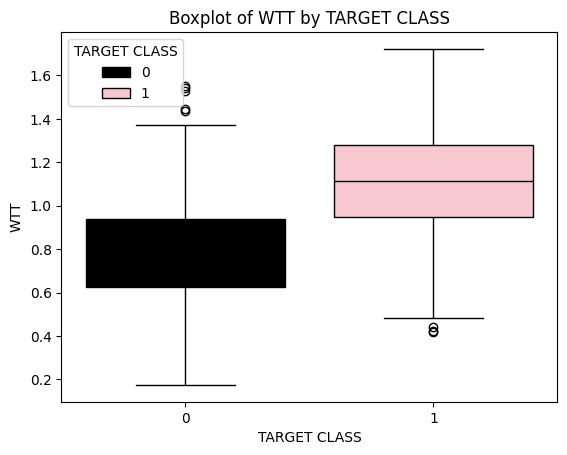

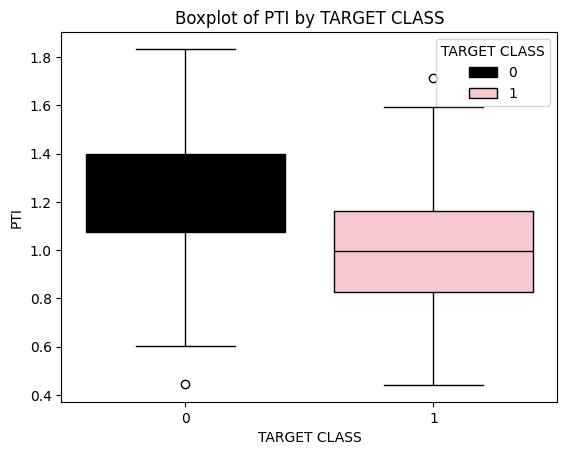

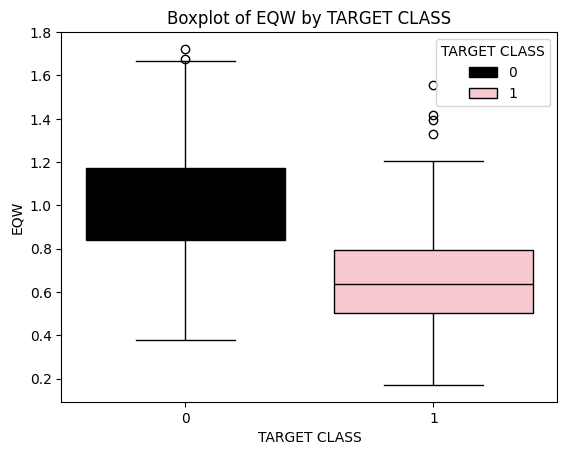

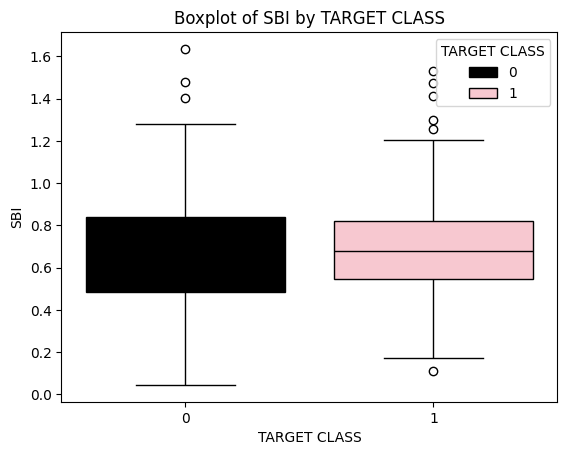

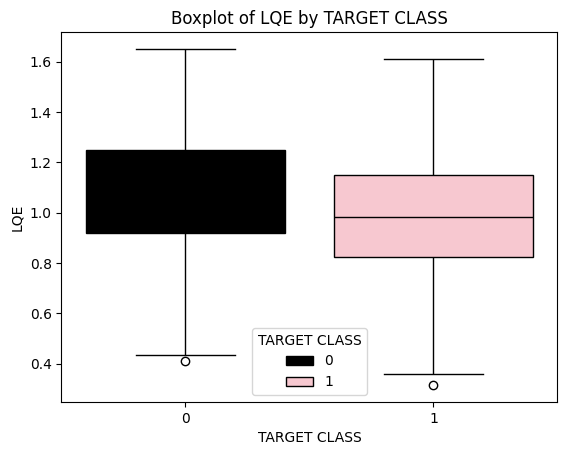

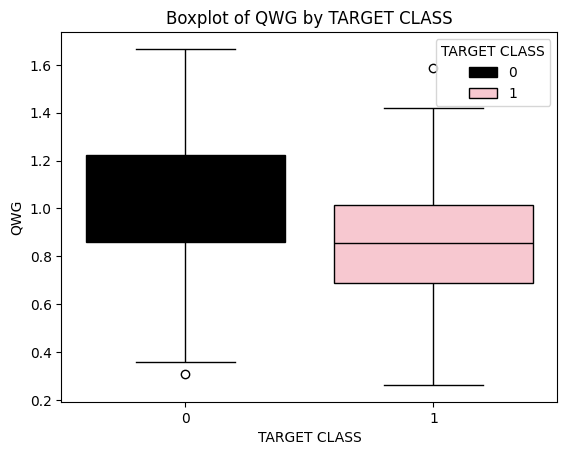

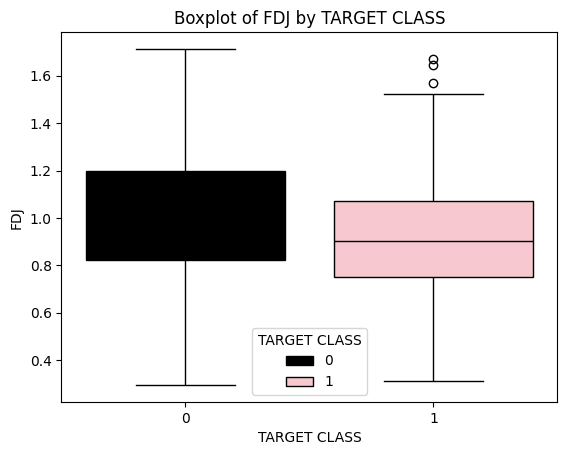

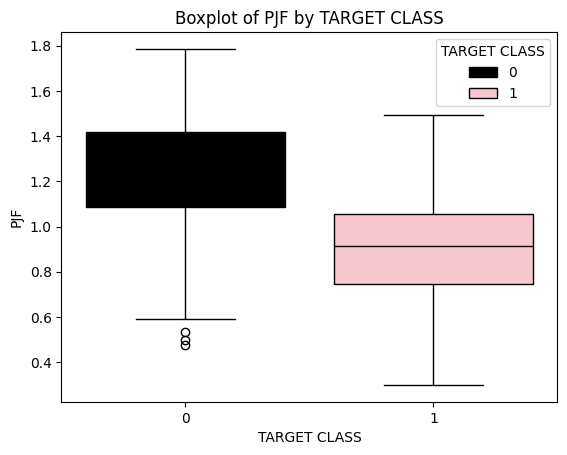

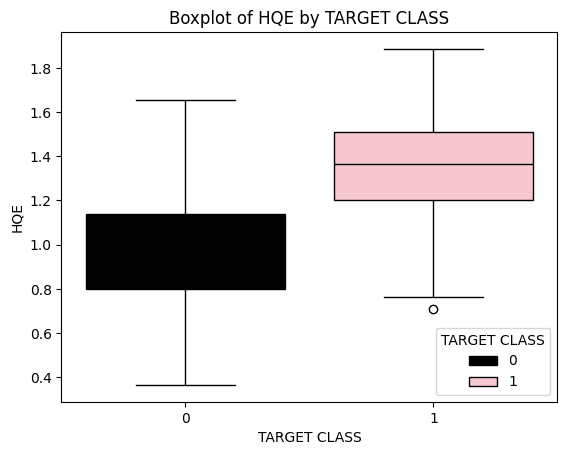

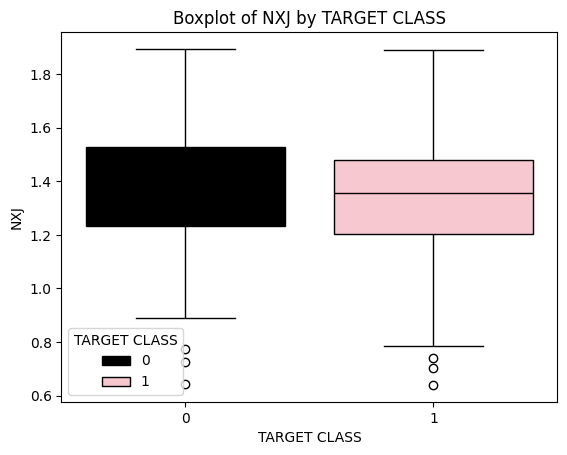

In [ ]:
# Draw boxplots for each feature with respect to the target class
for feature in features:
    plt.figure()
    sns.boxplot(x='TARGET CLASS', y=feature, data=df, hue='TARGET CLASS', palette={0: 'black', 1: 'pink'})
    plt.title(f'Boxplot of {feature} by TARGET CLASS')
    plt.show()

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
# Create a new DataFrame with the scaled features
df_feat = pd.DataFrame(scaled_features, columns=features)

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.30, random_state=101)

In [ ]:
# Instantiate the KNeighborsClassifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions
pred = knn.predict(X_test)

In [ ]:
# Evaluate the classification quality
conf_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[151   8]
 [ 15 126]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
# Calculate and print the misclassification error rate
misclassification_error = round(np.mean(pred != y_test), 3)
print("Misclassification error rate:", misclassification_error)

Misclassification error rate: 0.077


In [ ]:
# Choosing 'k' by elbow method
error_rate = []

In [ ]:
# Will take some time
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

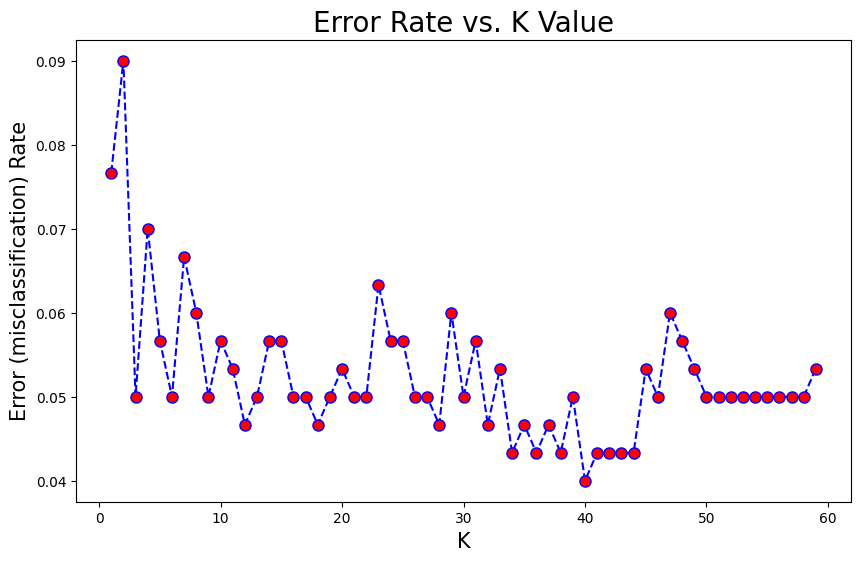

In [ ]:
# Plot the error rate vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error (misclassification) Rate', fontsize=15)
plt.show()